In [1]:
from qiskit import transpile

from qiskit.providers.fake_provider import FakeWashingtonV2

from multiples_functions import oracle_multiples

import pandas as pd

import time

import numpy as np

import random

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import os

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

In [3]:
%matplotlib inline

In [4]:
backend = FakeWashingtonV2()

# Depth of different numbers for input qubits

In [5]:
numbers = [3, 5, 12, 17, 58, 107]

In [6]:
qubits = list(range(5, 21))

In [7]:
df = pd.DataFrame(0, index=qubits, columns=numbers)

Calculating (commented because data already calculated in depth_total.csv)

In [8]:
# for number in numbers:
#     aux_qubits = np.ceil((np.log2(number))).astype(int)
#     df.loc['aux', number] = aux_qubits
#     for nqubits in qubits:
#         start = time.time()
#         print('Number: %d, number of qubits: %d'%(number, nqubits))
#         oracle = oracle_multiples(k=number, nqubits_input=nqubits, approx_QFT=0, init_H=False, classic_register=False)
#         oracle_transpiled = transpile(circuits=oracle, backend=backend, optimization_level=3)
#         depth = oracle_transpiled.depth()
#         print('Depth: %d'%(depth))
#         df.loc[str(nqubits), number] = depth
#         end = time.time()
#         print('Time: %.2f s.'%(end-start))

# # df.to_csv('depth_total.csv')

In [9]:
df = pd.read_csv(os.path.join(os.path.pardir, 'data_depth', 'depth_total.csv'), index_col=0)

In [10]:
df.columns = df.columns.astype(int)

In [11]:
folder = 'plots_depth'
filename = 'depth_diff_k.pdf'
dpi = 400

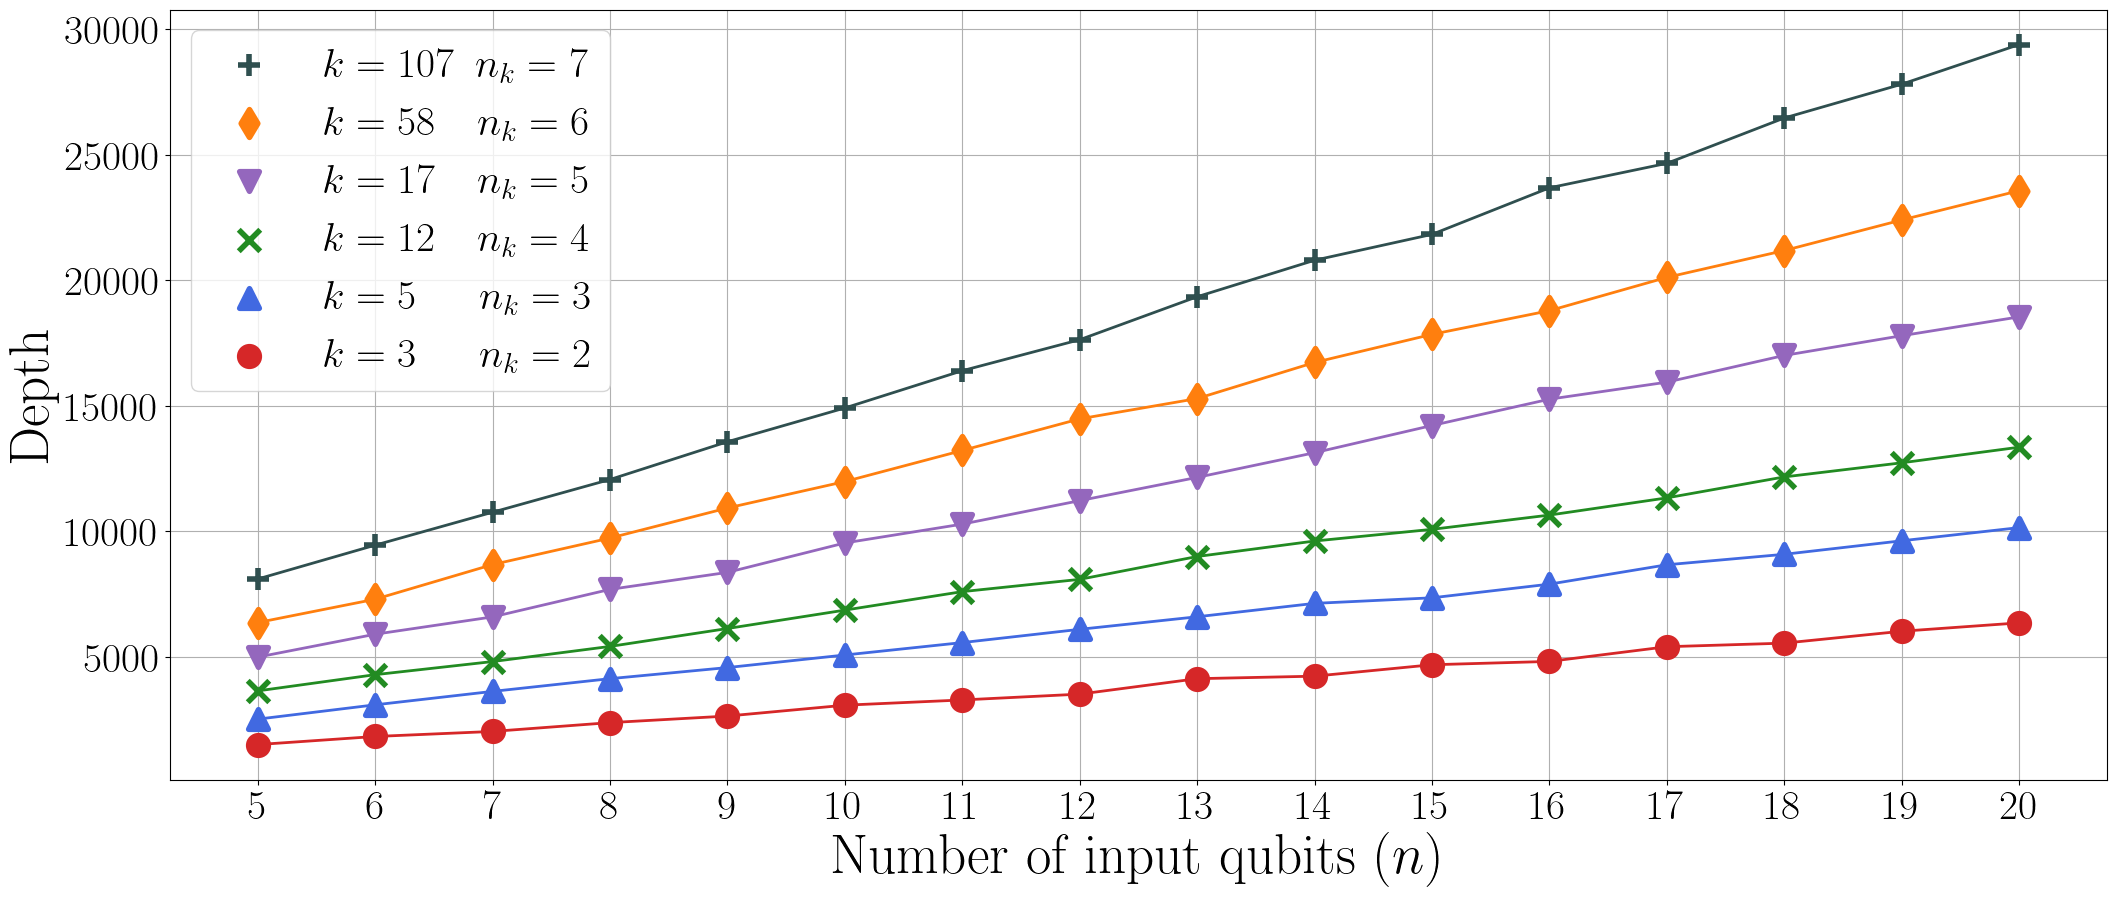

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (25, 10))

# colors_list = ['royalblue', 'tomato', 'limegreen', 'goldenrod', 'black', 'mediumpurple', 'darkred']
# colors_list = ['black']*6
# colors_list = list(mcolors.TABLEAU_COLORS.values())
# np.random.shuffle(colors_list)

colors_list = ['tab:red', 'royalblue', 'forestgreen', 'tab:purple','tab:orange', 'darkslategray']

markers_list = ['o', '^', 'x', 'v', 'd', '+']
markersize = 10
markers_size = dict(zip(markers_list, [markersize, markersize, markersize+2, markersize, markersize, markersize+2]))

colors = dict(zip(numbers, colors_list[:len(numbers)]))
markers = dict(zip(numbers, markers_list[:len(numbers)]))


linewidth_marker = 4
linewidth = 2

fontsize = 40

x = [a for a in df.index if a!='aux']
# x = [str(q) for q in qubits]

for number in sorted(numbers)[::-1]:
    # if markers[number]=='x':
    ax.plot(qubits, df.loc[x, number].values, colors[number], linewidth=linewidth, zorder=3)
    ax.scatter(qubits, df.loc[x, number].values, color=colors[number], s=markers_size[markers[number]]*20,
               marker=markers[number], linewidths=linewidth_marker, zorder=3,
               label='$k='+str(number) + '' + r'\,'*3*(4-len(str(number)))  + 'n_k=' + str(np.ceil(np.log2(number)).astype(int)) + '$')
    # else:
    #     ax.plot(qubits, df_depth.loc[x, number].values, colors[number], label=str(number),
    #             marker=markers[number], markersize=markersize, linewidth=linewidth, zorder=3)

ax.grid(axis='both', zorder=0)

ax.set_xticks([int(a) for a in x])

ax.set_ylabel('Depth', fontsize=fontsize)
ax.set_xlabel('Number of input qubits ($n$)', fontsize=fontsize)

fontsize_ticks = 30
ax.tick_params(labelsize=fontsize_ticks)

ax.legend(fontsize=fontsize-10)

plt.savefig(fname=os.path.join(os.path.pardir, folder, filename), bbox_inches='tight') #, dpi=200)

# Depth of different numbers for multiples, fixing number of input qubits

In [13]:
choices_k = [sorted(random.sample(range(2**(i), 2**(i+1)), max(min(2**i//16, 2**i//8), 2))) for i in range(2, 7)]
choices_k = [item for sublist in choices_k for item in sublist]

In [14]:
choices_k = [3, 7, 9, 14, 15, 17, 23, 26, 31, 34, 39, 47, 61, 67, 75, 95, 109, 121]

In [15]:
choices_k

[3, 7, 9, 14, 15, 17, 23, 26, 31, 34, 39, 47, 61, 67, 75, 95, 109, 121]

In [16]:
drops = [3, 14]

In [17]:
choices_k = [a for a in choices_k if a not in drops]

In [18]:
choices_k

[7, 9, 15, 17, 23, 26, 31, 34, 39, 47, 61, 67, 75, 95, 109, 121]

In [19]:
list_n_k = [len(bin(number-1))-2 for number in choices_k]

In [20]:
list_n_k

[3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7]

In [21]:
dic_n_k = dict(zip(choices_k, list_n_k))

In [22]:
qubits = [5, 6, 7, 8, 9]

In [23]:
df = pd.DataFrame(0, index=choices_k, columns=qubits)

Calculating (commented because data already calculated in depth_total.csv)

In [24]:
# for nqubits in qubits:
#     print('Input qubits: %d'%nqubits)
#     for number in [61]:
#         start = time.time()
#         n_k = dic_n_k[number]
#         print('Number: %d, n_k=%d, input qubits: %d'%(number, n_k, nqubits))
#         oracle = oracle_multiples(k=number, nqubits_input=nqubits, approx_QFT=0, init_H=False, classic_register=False)
#         oracle_transpiled = transpile(circuits=oracle, backend=backend, optimization_level=3)
#         depth = oracle_transpiled.depth()
#         print('Depth: %d'%(depth))
#         df.loc[number, nqubits] = depth
#         end = time.time()
#         print('Time: %.2f s.'%(end-start))

In [25]:
df = pd.read_csv(os.path.join(os.path.pardir, 'data_depth', 'depth_input_fixed.csv'), index_col=0)

In [26]:
df

,5,6,7,8,9
3,1437.0,1923.0,2115.0,2550.0,2849.0
7,2594.0,3134.0,3672.0,4124.0,4664.0
9,3687.0,4499.0,5138.0,5751.0,6565.0
14,3568.0,4308.0,4994.0,5539.0,6396.0
15,3674.0,4411.0,5062.0,5955.0,6488.0
17,5056.0,5968.0,6829.0,7586.0,8758.0
23,5047.0,5956.0,6771.0,7784.0,8731.0
26,4910.0,5870.0,6790.0,7650.0,8605.0
31,5151.0,5942.0,6970.0,7846.0,8712.0
34,6222.0,7399.0,8693.0,9586.0,10662.0


In [27]:
df = df.drop(drops, axis=0)

In [28]:
qubits

[5, 6, 7, 8, 9]

In [29]:
list_n_k

[3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7]

In [30]:
qubits

[5, 6, 7, 8, 9]

In [31]:
unique_n_k = sorted(list(set(list_n_k)))

In [32]:
folder = 'plots_depth'
filename = 'depth_different_nqubits_input.pdf'
dpi = 400

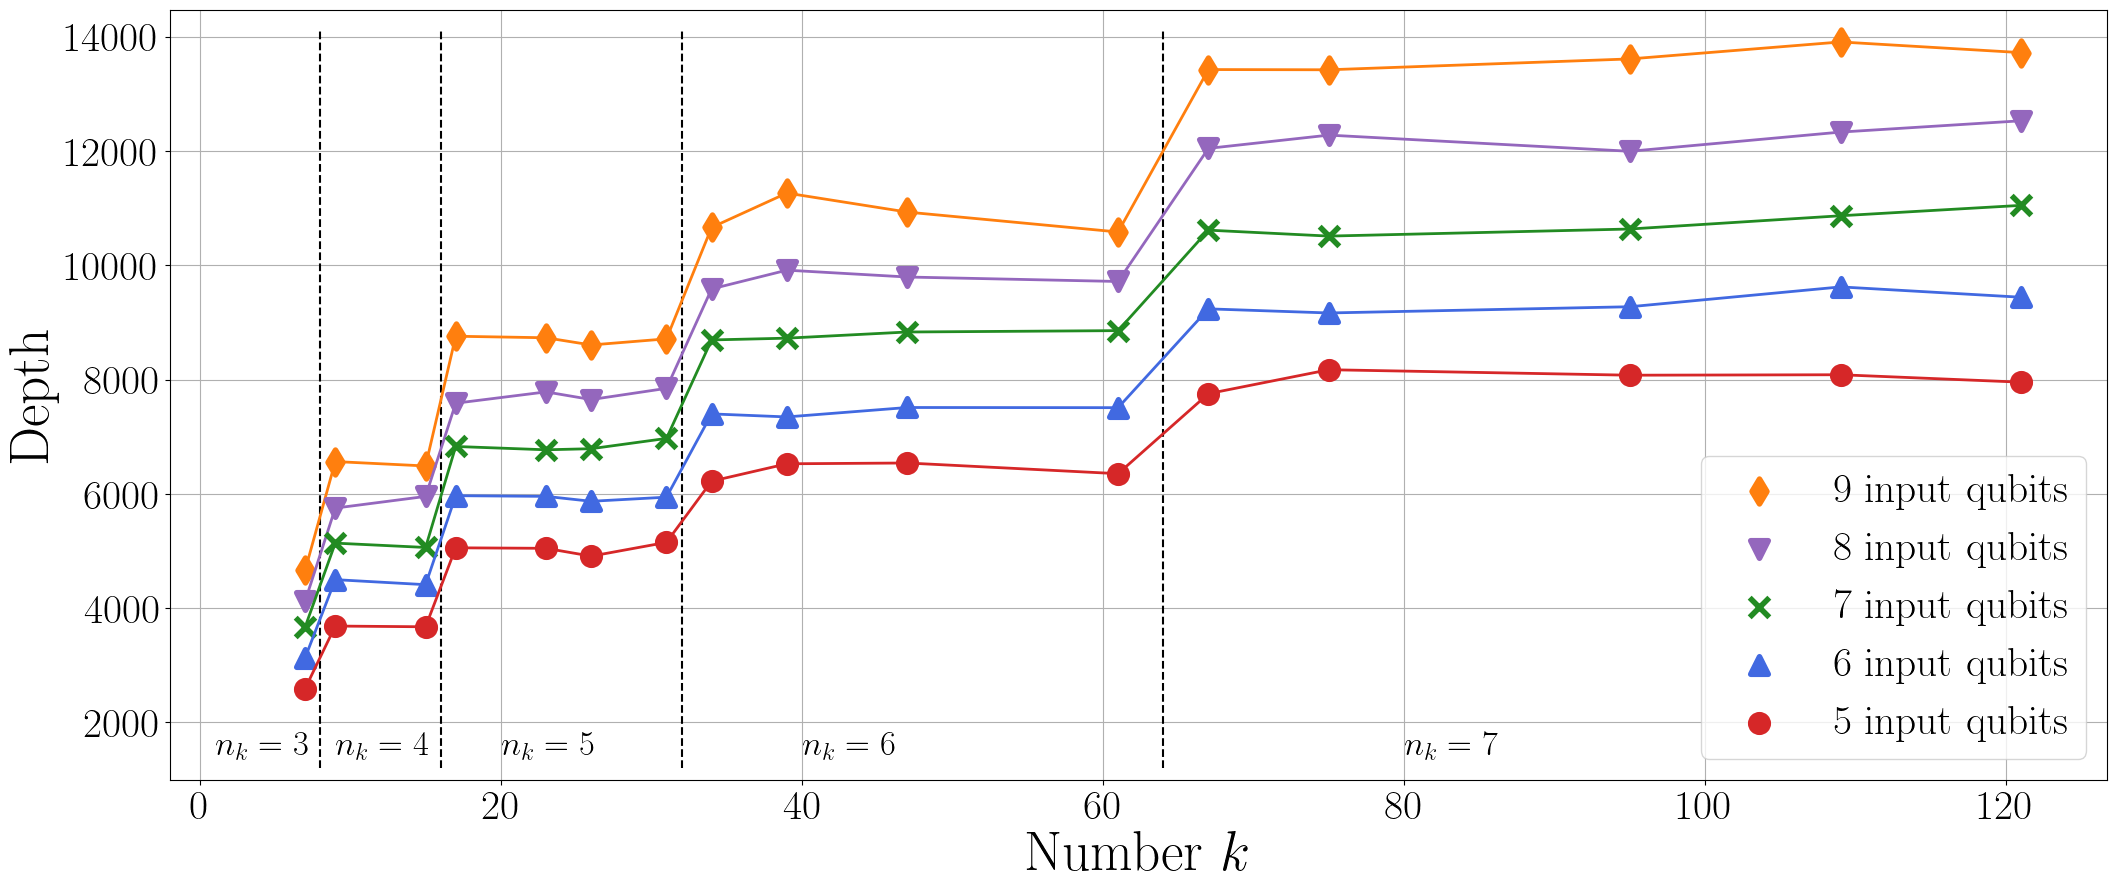

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (25, 10))

# colors_list = ['royalblue', 'tomato', 'limegreen', 'goldenrod', 'black', 'mediumpurple', 'darkred']
# colors_list = ['black']*6
# colors_list = list(mcolors.TABLEAU_COLORS.values())
# np.random.shuffle(colors_list)

colors_list = ['tab:red', 'royalblue', 'forestgreen', 'tab:purple','tab:orange', 'darkslategray']

markers_list = ['o', '^', 'x', 'v', 'd', '+']
markersize = 8
markers_size = dict(zip(markers_list, [markersize, markersize, markersize+2, markersize, markersize, markersize+2]))

colors = dict(zip(qubits, colors_list[:len(qubits)]))
markers = dict(zip(qubits, markers_list[:len(qubits)]))


linewidth_marker = 4
linewidth = 2

fontsize = 40

x = [a for a in df.index if a!='aux']
# x = [str(q) for q in qubits]
x = list(range(1, 2**list_n_k[-1]))

for nqubit in sorted(qubits)[::-1]:
    # if markers[number]=='x':
    ax.plot(choices_k, df.loc[choices_k, str(nqubit)].values, colors[nqubit], linewidth=linewidth, zorder=3)
    ax.scatter(choices_k, df.loc[choices_k, str(nqubit)].values, color=colors[nqubit], s=markers_size[markers[nqubit]]*20,
               marker=markers[nqubit], linewidths=linewidth_marker, zorder=3,
               label='%d input qubits'%(nqubit))
    # else:
    #     ax.plot(qubits, df_depth.loc[x, number].values, colors[number], label=str(number),
    #             marker=markers[number], markersize=markersize, linewidth=linewidth, zorder=3)

ax.grid(axis='both', zorder=0)

# ax.set_xticks(x)
# ax.set_xticklabels([str(a) for a in x if a in df.index])

ax.set_ylabel('Depth', fontsize=fontsize)
ax.set_xlabel('Number $k$', fontsize=fontsize)

fontsize_ticks = 30
ax.tick_params(labelsize=fontsize_ticks)

ax.legend(fontsize=fontsize-10, loc='lower right')

ax.set_ylim(1000, ax.get_ylim()[1])

ax.set_xlim(-2, ax.get_xlim()[1])

ylims = ax.get_ylim()

ymin = ylims[0] + (ylims[1]-ylims[0])*0.03/2
ymax = ylims[1] - (ylims[1]-ylims[0])*0.05/2

positions = [1, 9] + [2**(n_k-1)+2**(n_k-3) for n_k in unique_n_k[2:]]

for n_k, pos in zip(unique_n_k, positions):
    ax.vlines(x = 2**n_k, ymin=ymin, ymax=ymax, linestyles='dashed', colors='k')
    ax.text(x=pos, y=ymin*1.2, s='$n_k=%d$'%n_k, fontsize=25)

plt.savefig(fname=os.path.join(os.path.pardir, folder, filename), bbox_inches='tight', dpi=400)

In [174]:
df_n_k = df.copy()

In [175]:
df_n_k.index = [dic_n_k[a] for a in df_n_k.index]

In [176]:
df_n_k['n_k'] = df_n_k.index.values

In [177]:
df_n_k

,5,6,7,8,9,n_k
3,2594.0,3134.0,3672.0,4124.0,4664.0,3
4,3687.0,4499.0,5138.0,5751.0,6565.0,4
4,3674.0,4411.0,5062.0,5955.0,6488.0,4
5,5056.0,5968.0,6829.0,7586.0,8758.0,5
5,5047.0,5956.0,6771.0,7784.0,8731.0,5
5,4910.0,5870.0,6790.0,7650.0,8605.0,5
5,5151.0,5942.0,6970.0,7846.0,8712.0,5
6,6222.0,7399.0,8693.0,9586.0,10662.0,6
6,6526.0,7346.0,8724.0,9914.0,11263.0,6
6,6540.0,7511.0,8832.0,9794.0,10930.0,6


In [178]:
df_n_k_mean = df_n_k.groupby('n_k').mean()

In [179]:
choices_n_k = df_n_k.index.values

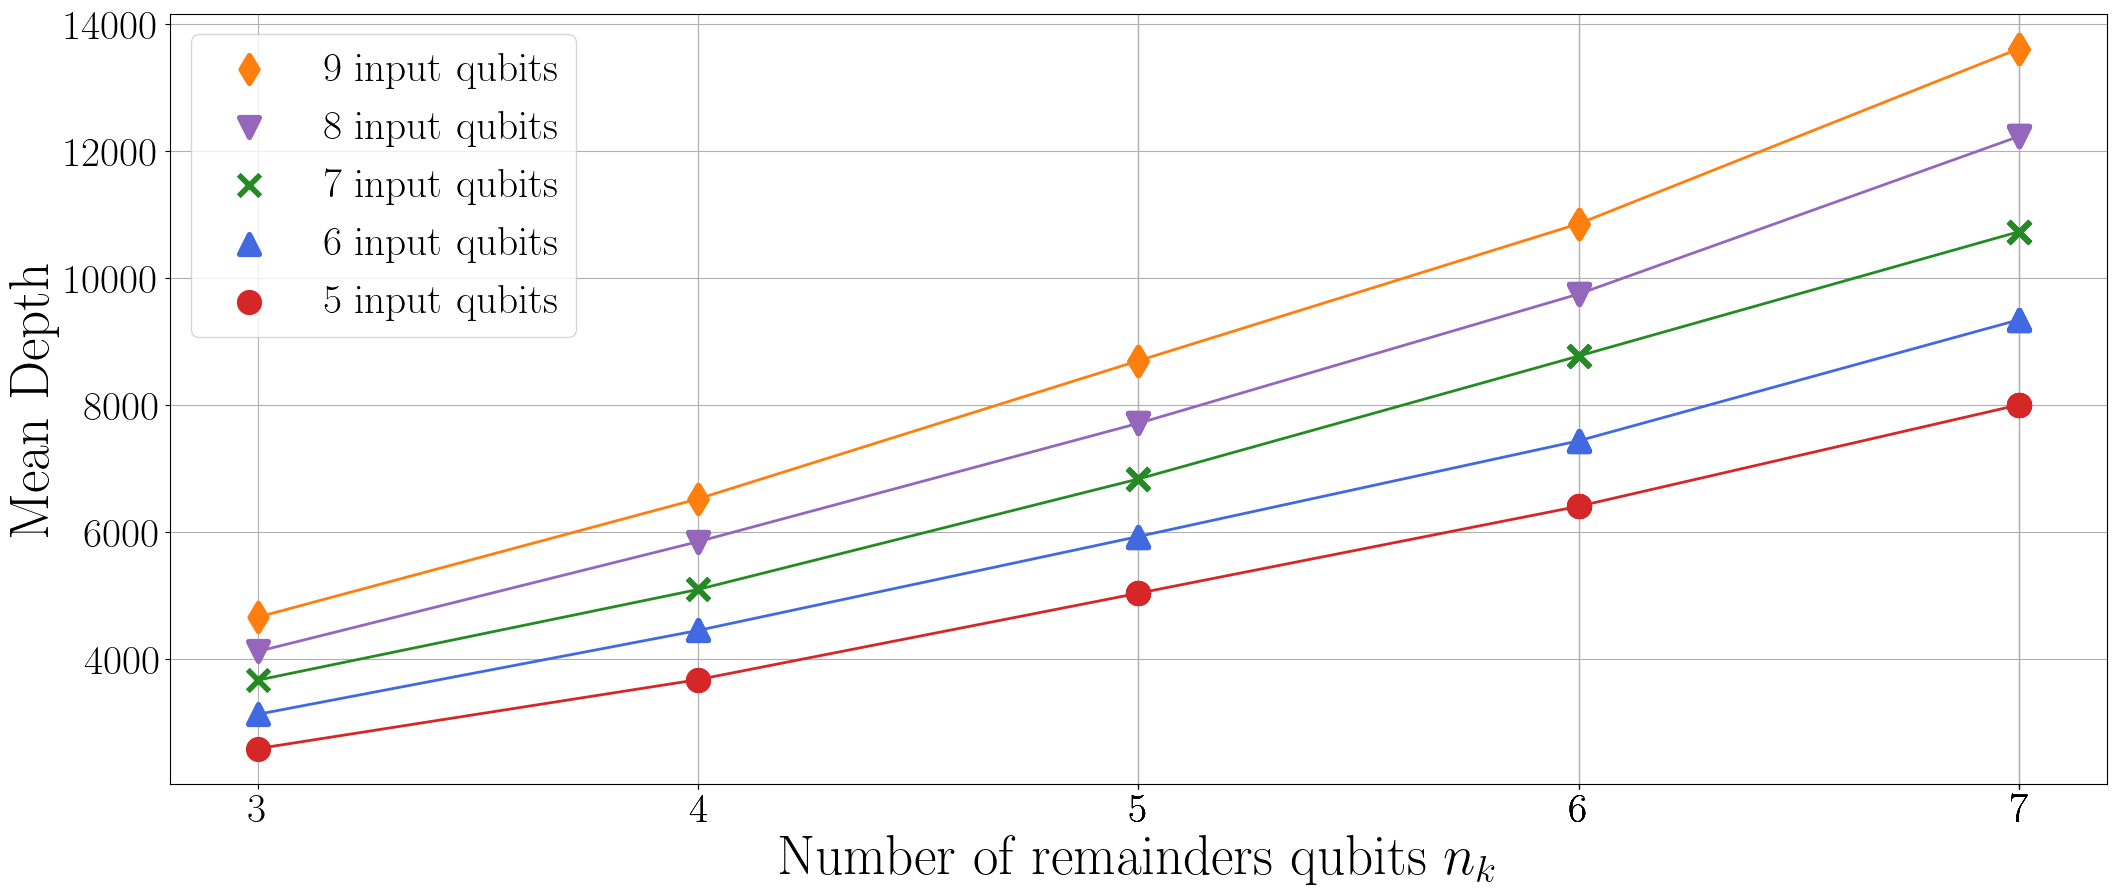

In [182]:
fig, ax = plt.subplots(1, 1, figsize = (25, 10))

# colors_list = ['royalblue', 'tomato', 'limegreen', 'goldenrod', 'black', 'mediumpurple', 'darkred']
# colors_list = ['black']*6
# colors_list = list(mcolors.TABLEAU_COLORS.values())
# np.random.shuffle(colors_list)

colors_list = ['tab:red', 'royalblue', 'forestgreen', 'tab:purple','tab:orange', 'darkslategray']

markers_list = ['o', '^', 'x', 'v', 'd', '+']
markersize = 10
markers_size = dict(zip(markers_list, [markersize, markersize, markersize+2, markersize, markersize, markersize+2]))

colors = dict(zip(qubits, colors_list[:len(qubits)]))
markers = dict(zip(qubits, markers_list[:len(qubits)]))


linewidth_marker = 4
linewidth = 2

fontsize = 40

x = [a for a in df_n_k_mean.index if a!='aux']
# x = [str(q) for q in qubits]
x = list(range(1, 2**list_n_k[-1]))

for nqubit in sorted(qubits)[::-1]:
    # if markers[number]=='x':
    ax.plot(choices_n_k, df_n_k_mean.loc[choices_n_k, str(nqubit)].values, colors[nqubit], linewidth=linewidth, zorder=3)
    ax.scatter(choices_n_k, df_n_k_mean.loc[choices_n_k, str(nqubit)].values, color=colors[nqubit], s=markers_size[markers[nqubit]]*20,
               marker=markers[nqubit], linewidths=linewidth_marker, zorder=3,
               label='%d input qubits'%(nqubit))
    # else:
    #     ax.plot(qubits, df_n_k_mean_depth.loc[x, number].values, colors[number], label=str(number),
    #             marker=markers[number], markersize=markersize, linewidth=linewidth, zorder=3)

ax.grid(axis='both', zorder=0)

ax.set_xticks(choices_n_k)
# ax.set_xticklabels([str(a) for a in x if a in df_n_k_mean.index])

ax.set_ylabel('Mean Depth', fontsize=fontsize)
ax.set_xlabel('Number of remainders qubits $n_k$', fontsize=fontsize)

fontsize_ticks = 30
ax.tick_params(labelsize=fontsize_ticks)

ax.legend(fontsize=fontsize-10)

# plt.savefig(fname='depth_diff_k.png', bbox_inches='tight', dpi=200)